# Imports

In [48]:
%reload_ext autoreload
%matplotlib inline

In [49]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


import cartopy.crs as ccrs
import matplotlib.cm as cm
import psutil
import pytz
thismodule = sys.modules[__name__]

#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [50]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [51]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [52]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [53]:
toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [54]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11100
 . duration: 12.5
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.18
 . lonInit: 115.04
 . latInit: 20.71
 . Utime_End: 17014.42
 . lonEnd: 116.37
 . latEnd: 21.88
 . lonmin: 114.93
 . latmin: 20.71
 . lonmax: 116.37
 . latmax: 21.89
 . vavg: 4.2
 . dist: 189.2
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32864.0
 . surfmaxkm2_132Wm2: 32592.0
 . surfmaxkm2_110Wm2: 32320.0
 . surfmaxkm2_90Wm2: 31520.0
 . surfcumkm2_172Wm2: 354480.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.6737
 . localtime_End: 17015.1774
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [55]:
# to access an attribute:
toocan[4].duration

12.5

# Question: For the most extreme precipitation in one time step:
1. Does an MCS exist at those coordinates?
2. What MCS is it? --> what label?
3. What does a given variable for this MCS look like in comparison to the spatial average at that time? --> e.g. average wind speed?
4. What does a given variable for this MCS look like in comparison to the average over all time and space?

<span style="color:pink">## choose attribute and number of bins</span>

In [56]:
attribute = "vavg"
nbins = 48

<span style="color:pink">##</span>

In [57]:
def importData(i_t):
    
    # paths
    root_DYAMOND = df.iloc[i_t]['path_dyamond'] + '.%s.2D.nc'
    file_PW_DYAMOND = root_DYAMOND%'PW'
    file_Precac_DYAMOND = root_DYAMOND%'Precac'
    path_TOOCAN_SEG = "/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/TOOCAN_SEG/"
    path_TOOCAN = path_TOOCAN_SEG + ((df.iloc[i_t]['img_seg_path'])[65:94])

    # Check if file exists
    if os.path.exists(os.path.join(DIR_DYAMOND, file_PW_DYAMOND)):
        # Load DYAMOND data
        PW_DYAMOND = xr.open_dataarray(os.path.join(DIR_DYAMOND, file_PW_DYAMOND))
        
        # Load TOOCAN data
        img_TOOCAN = xr.open_dataarray(path_TOOCAN)
    else:
        # Increase i_t by 1
        i_t += 1
        # Recursive call with the updated i_t
        PW_DYAMOND, img_TOOCAN = importData(i_t)
    return PW_DYAMOND, img_TOOCAN


In [58]:
def getCoords2D(dataset,slice_lon,slice_lat):
    
    # get correct coordinate names in dataset
    for prefix in 'lat','lon':
        r = re.compile("%s.*"%prefix)
        coord = list(filter(r.match,list(dataset.coords.dims)))[0]
        setattr(thismodule,'%s_coord'%prefix,coord)
    
    # extract coordinates
    lat_1D = dataset[lat_coord].sel({lat_coord:slice_lat})
    lon_1D = dataset[lon_coord].sel({lon_coord:slice_lon})

    # compute 2D meshgrid of coordinates
    lonarray,latarray = np.meshgrid(lon_1D,lat_1D)
    
    return lonarray,latarray

In [59]:
def showColorBar(fig,ax,im):
    
    x,y,w,h = ax.get_position().bounds
    dx = w/60
    cax = plt.axes([x+w+2*dx,y,dx,h])
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.set_ylabel('Precipitable Water (kg/m²)')

In [68]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
def initFigureExtremes(i_t0,Lx_fig,Ly_fig,percentile, title=None,norm=None,):
    # initialize figure
    fig = plt.figure(figsize=(Lx_fig,Ly_fig))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

    ims = []
    ## MY EDIT
    # ims = [[ax.imshow(np.zeros((Ly_fig, Lx_fig))), ax.imshow(np.zeros((Ly_fig, Lx_fig)))] for _ in range(2)]
    
    # for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):
    for slice_lon in [slice(lon_lim[0], lon_lim[1])]:

        #- background

        # coords
        lonarray_dyamond,latarray_dyamond = getCoords2D(PW_DYAMOND,slice_lon,slice_lat)            
        # data
        Z = PW_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]
        
        # # log scale
        # Z = np.log(Z)
        
        # Finding Extremes
        
        threshold = np.nanpercentile(Z, percentile)
        print(threshold)

        
        extreme_values = xr.where(Z >= threshold, Z, np.nan)
        extreme_values_lon = extreme_values.lon.values
        extreme_values_lat = extreme_values.lat.values

        # Convert DataArray to numpy array
        extreme_values_np = extreme_values.values

        # Get non-NaN values and their coordinates using boolean indexing
        non_nan_values = extreme_values_np[~np.isnan(extreme_values_np)]
        non_nan_indices = np.argwhere(~np.isnan(extreme_values_np))

        for index in non_nan_indices:
            value = extreme_values_np[tuple(index)]
            lon = extreme_values_lon[index[1]]
            lat = extreme_values_lat[index[0]]
            # print(f"Value: {value}, Lon: {lon}, Lat: {lat}")
        
        # Custom color map
        # Get the RdBu colormap
        cmap = plt.cm.RdBu

        # Create a copy of the colormap
#         custom_cmap = cmap.copy()
        custom_cmap = ListedColormap(cmap.colors)

        # Define the color for values above the threshold
        above_threshold_color = 'black'

        # Set the color for values above the threshold to black
        custom_cmap.set_over(above_threshold_color, alpha=1.0)
        
        # Normalize the threshold value to the range [0, 1]
        norm_threshold = threshold / np.nanmax(extreme_values_np)

        # Create a new colormap with the modified colors and threshold
        custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [
            (0, cmap(0)),
            (norm_threshold, cmap(norm_threshold)),
            (norm_threshold, above_threshold_color),
            (1, above_threshold_color)
        ])
        
        # show
        im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=custom_cmap)
        im.set_clim(*clim)

        #- MCSs
        
        # coords
        lonarray_toocan,latarray_toocan = getCoords2D(img_TOOCAN,slice_lon,slice_lat)            
        # data
        IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10    
        # show
        im_MCS = ax.pcolormesh(lonarray_toocan,latarray_toocan,IMG_SEG,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)

        # store image placeholders for later updating
        ims.append([im,im_MCS])

    # delete data and remove from memory
    # del Precac_DYAMOND
    # del img_TOOCAN
    del Z
    del IMG_SEG
    gc.collect()
    
    # cosmetics
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    showColorBar(fig,ax,im)
        
    # ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
    ax.coastlines('110m')
    ax.gridlines()
    
    return fig, ax, ims

In [69]:
i_t_chosen = 100
extreme_percentile = 99.99

## image
cmap = plt.cm.RdBu
# cmap_mcs = plt.cm.get_cmap('rainbow', 10)
cmap_mcs = plt.cm.get_cmap('Set3', 12)

clim = (0,70)

#-- Lon and Lat limits
lon_lim = (130,165)
lat_lim = (0,20)
slice_lat = slice(*lat_lim)

dlon = np.diff(lon_lim)[0] % 360
dlat = np.diff(lat_lim)[0]
Lx_fig = int(dlon / 3)
Ly_fig = int(dlat / 3)

In [70]:
PW_DYAMOND, img_TOOCAN = importData(i_t_chosen)

/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


79.95352049941965


AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

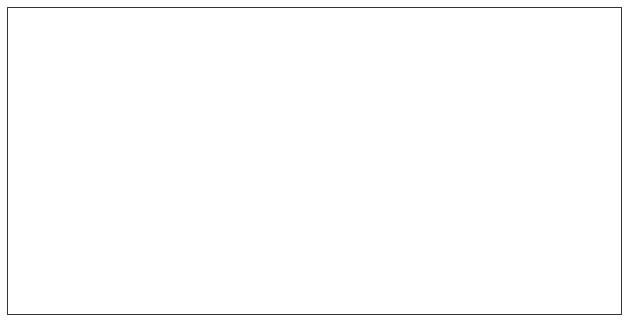

In [71]:
initFigureExtremes(i_t_chosen,Lx_fig,Ly_fig, percentile=extreme_percentile, title="Precipitable Water & MCS")